=== Example DataFrame Information ===
Shape: (263, 4)
Columns: ['Method', 'Dataset', 'MAE', 'PEHE']

Unique Methods: ['NetDeconf' 'SPNet' 'Balu_V1' 'Balu_V2' 'Balu_V3' 'Balu_V4' 'Balu_V5'
 'Balu_V6' 'Balu_V7' 'Balu_V8']
Unique Datasets: ['Instagram' 'BlogCatalog' 'Flickr' 'Youtube']

Data points per Method-Dataset combination:
Method   Dataset    
Balu_V1  BlogCatalog    8
         Flickr         8
         Instagram      8
         Youtube        8
Balu_V2  BlogCatalog    6
         Flickr         5
         Instagram      6
         Youtube        8
Balu_V3  BlogCatalog    7
         Flickr         7
dtype: int64

MAE Statistics:
count    250.000000
mean       0.122337
std        0.039542
min        0.027931
25%        0.094285
50%        0.120709
75%        0.149430
max        0.232408
Name: MAE, dtype: float64

PEHE Statistics:
count    251.000000
mean       0.685916
std        0.176768
min        0.263698
25%        0.558840
50%        0.687831
75%        0.804866
max        1.188

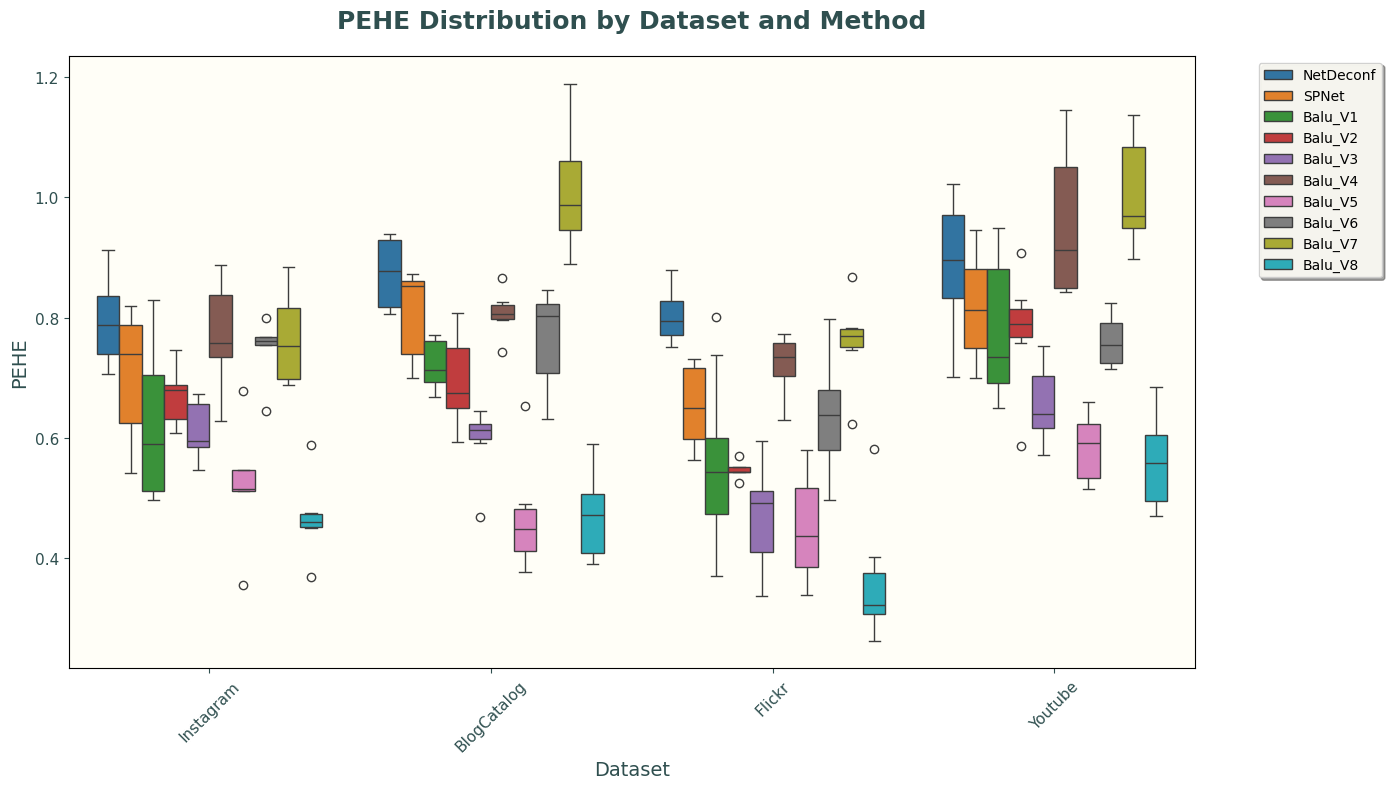

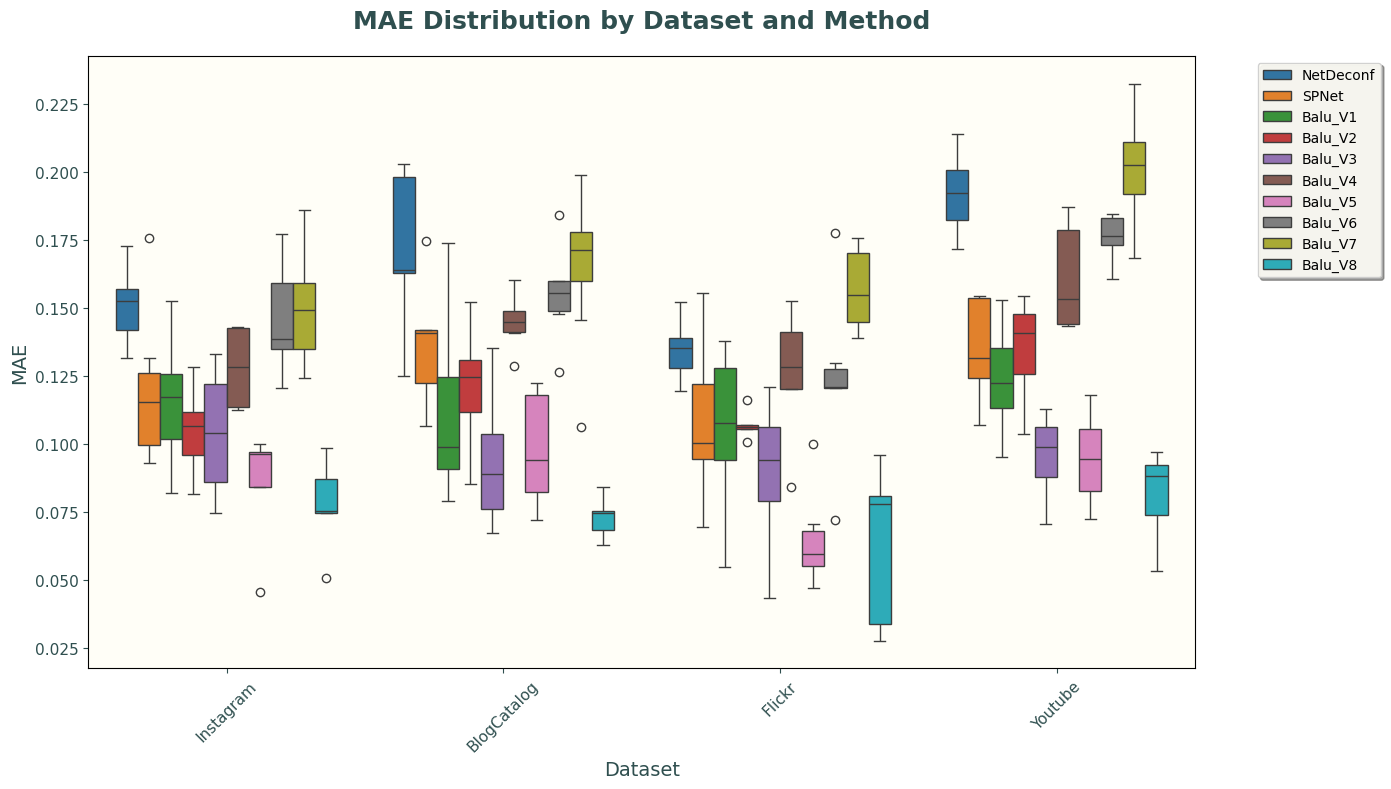

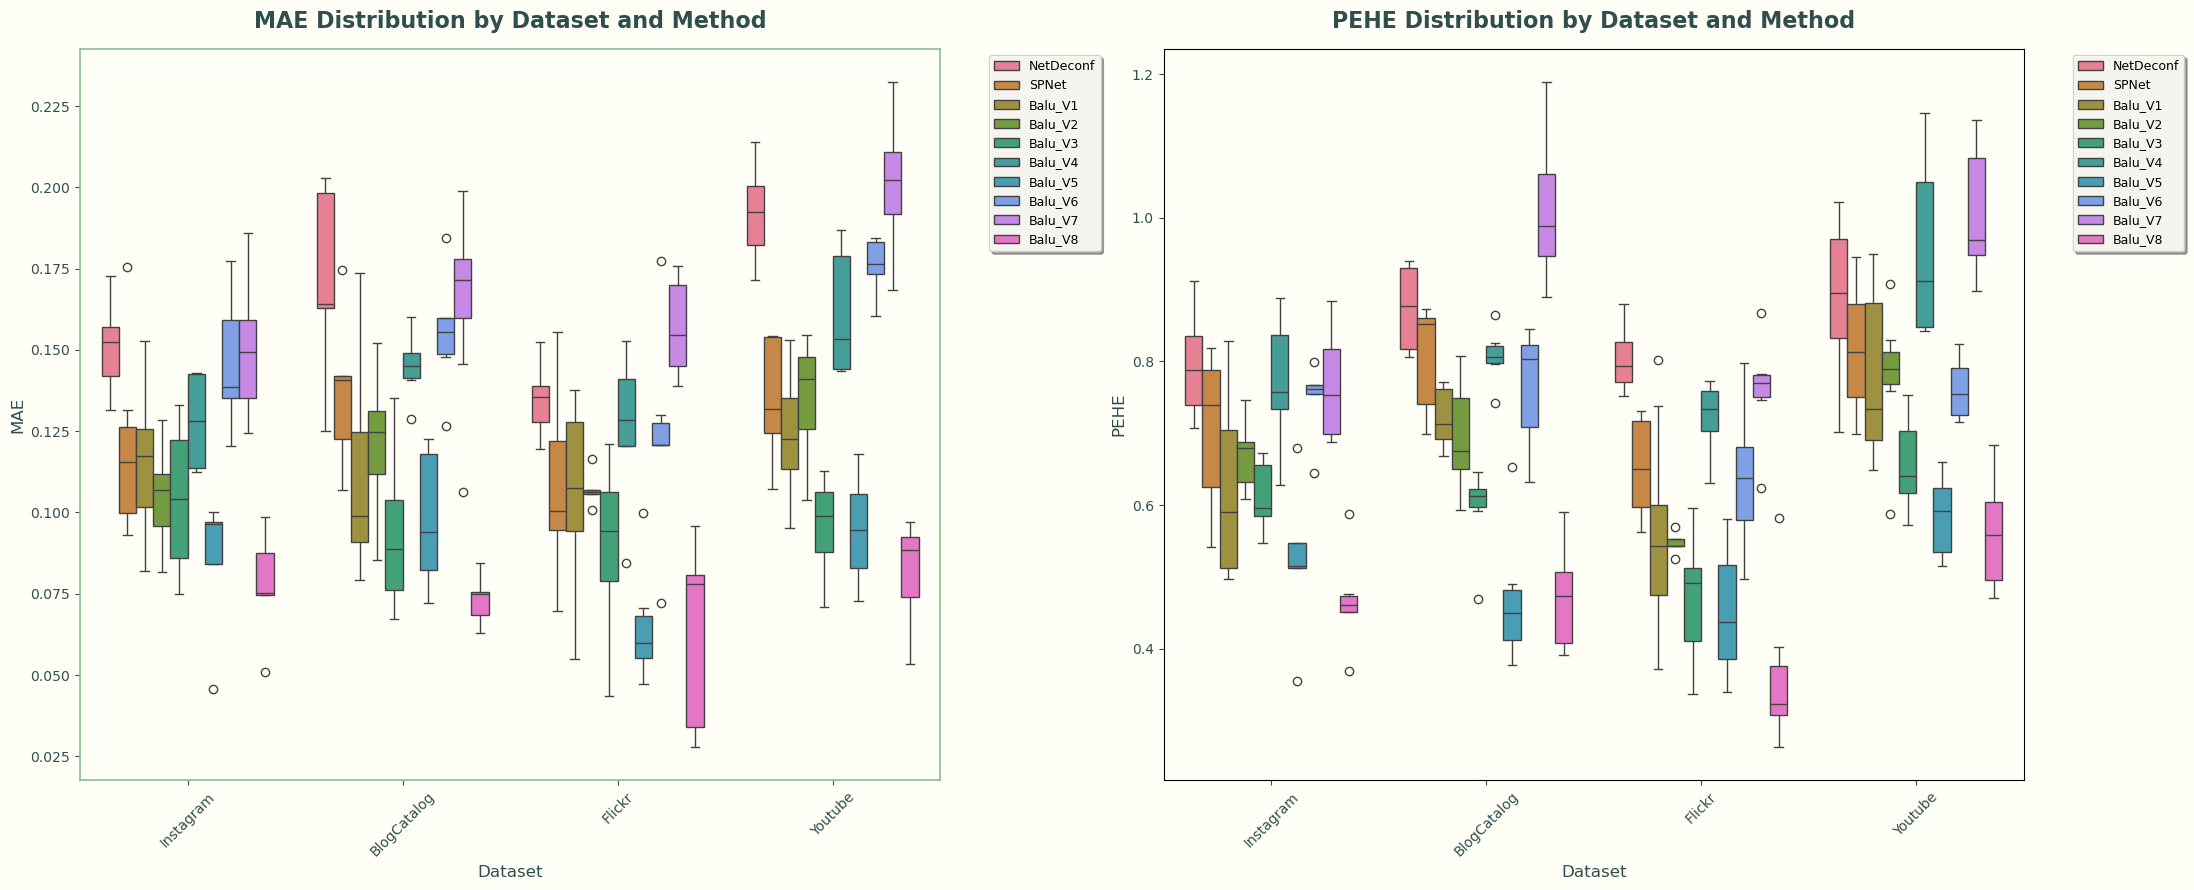


Example dataframe created successfully!
You can now test the visualization functions with:
1. create_grouped_boxplot(result_df, metric='PEHE')
2. create_grouped_boxplot(result_df, metric='MAE')
3. create_comparison_plots(result_df)
4. show_color_palette()


In [2]:
import pandas as pd
import numpy as np
from util import *
# Set random seed for reproducible results
np.random.seed(42)

def create_example_dataframe():
    """
    Create an example dataframe that matches the expected structure
    for testing the box plot functions
    """
    
    # Define methods and datasets as in your original code
    methods = ['NetDeconf', 'SPNet'] + [f'Balu_V{i+1}' for i in range(8)]
    datasets = ["Instagram", "BlogCatalog", "Flickr", "Youtube"]
    
    # Create multiple observations for each method-dataset combination
    # This creates realistic box plots with multiple data points
    data_rows = []
    
    for dataset in datasets:
        for method in methods:
            # Create 5-8 observations per method-dataset combination
            n_obs = np.random.randint(5, 9)
            
            for _ in range(n_obs):
                # Generate realistic metric values based on method performance
                # Different methods have different base performance levels
                
                if 'NetDeconf' in method:
                    mae_base = 0.15
                    pehe_base = 0.8
                elif 'SPNet' in method:
                    mae_base = 0.12
                    pehe_base = 0.7
                elif 'Balu_V1' in method:
                    mae_base = 0.10
                    pehe_base = 0.6
                elif 'Balu_V2' in method:
                    mae_base = 0.11
                    pehe_base = 0.65
                elif 'Balu_V3' in method:
                    mae_base = 0.09
                    pehe_base = 0.55
                elif 'Balu_V4' in method:
                    mae_base = 0.13
                    pehe_base = 0.75
                elif 'Balu_V5' in method:
                    mae_base = 0.08
                    pehe_base = 0.5
                elif 'Balu_V6' in method:
                    mae_base = 0.14
                    pehe_base = 0.72
                elif 'Balu_V7' in method:
                    mae_base = 0.16
                    pehe_base = 0.85
                else:  # Balu_V8
                    mae_base = 0.07
                    pehe_base = 0.45
                
                # Add dataset-specific variations
                dataset_factor = {
                    "Instagram": 1.0,
                    "BlogCatalog": 1.1,
                    "Flickr": 0.9,
                    "Youtube": 1.2
                }[dataset]
                
                # Generate values with some noise
                mae_val = mae_base * dataset_factor + np.random.normal(0, 0.02)
                pehe_val = pehe_base * dataset_factor + np.random.normal(0, 0.1)
                
                # Ensure positive values
                mae_val = max(0.01, mae_val)
                pehe_val = max(0.1, pehe_val)
                
                # Occasionally add NaN values to test filtering (5% chance)
                if np.random.random() < 0.05:
                    mae_val = np.nan
                if np.random.random() < 0.05:
                    pehe_val = np.nan
                
                data_rows.append({
                    'Method': method,
                    'Dataset': dataset,
                    'MAE': mae_val,
                    'PEHE': pehe_val
                })
    
    # Create DataFrame
    df = pd.DataFrame(data_rows)
    
    return df

def display_dataframe_info(df):
    """
    Display useful information about the dataframe
    """
    print("=== Example DataFrame Information ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nUnique Methods: {df['Method'].unique()}")
    print(f"Unique Datasets: {df['Dataset'].unique()}")
    
    print(f"\nData points per Method-Dataset combination:")
    combination_counts = df.groupby(['Method', 'Dataset']).size()
    print(combination_counts.head(10))
    
    print(f"\nMAE Statistics:")
    print(df['MAE'].describe())
    
    print(f"\nPEHE Statistics:")
    print(df['PEHE'].describe())
    
    print(f"\nMissing Values:")
    print(f"MAE: {df['MAE'].isna().sum()} missing")
    print(f"PEHE: {df['PEHE'].isna().sum()} missing")
    
    print(f"\nFirst 10 rows:")
    print(df.head(10))

# Create the example dataframe
result_df = create_example_dataframe()

# Display information about the dataframe
display_dataframe_info(result_df)

# Test the functions with the example data
print("\n" + "="*50)
print("TESTING THE BOX PLOT FUNCTIONS")
print("="*50)

# Import the required libraries and functions from the previous code
import matplotlib.pyplot as plt
import seaborn as sns

# You can now test the functions:
create_grouped_boxplot(result_df, metric='PEHE')
create_grouped_boxplot(result_df, metric='MAE') 
create_comparison_plots(result_df)
# show_color_palette()

print("\nExample dataframe created successfully!")
print("You can now test the visualization functions with:")
print("1. create_grouped_boxplot(result_df, metric='PEHE')")
print("2. create_grouped_boxplot(result_df, metric='MAE')")
print("3. create_comparison_plots(result_df)")
print("4. show_color_palette()")

In [ ]:
0.7**20

0.0007979226629761189

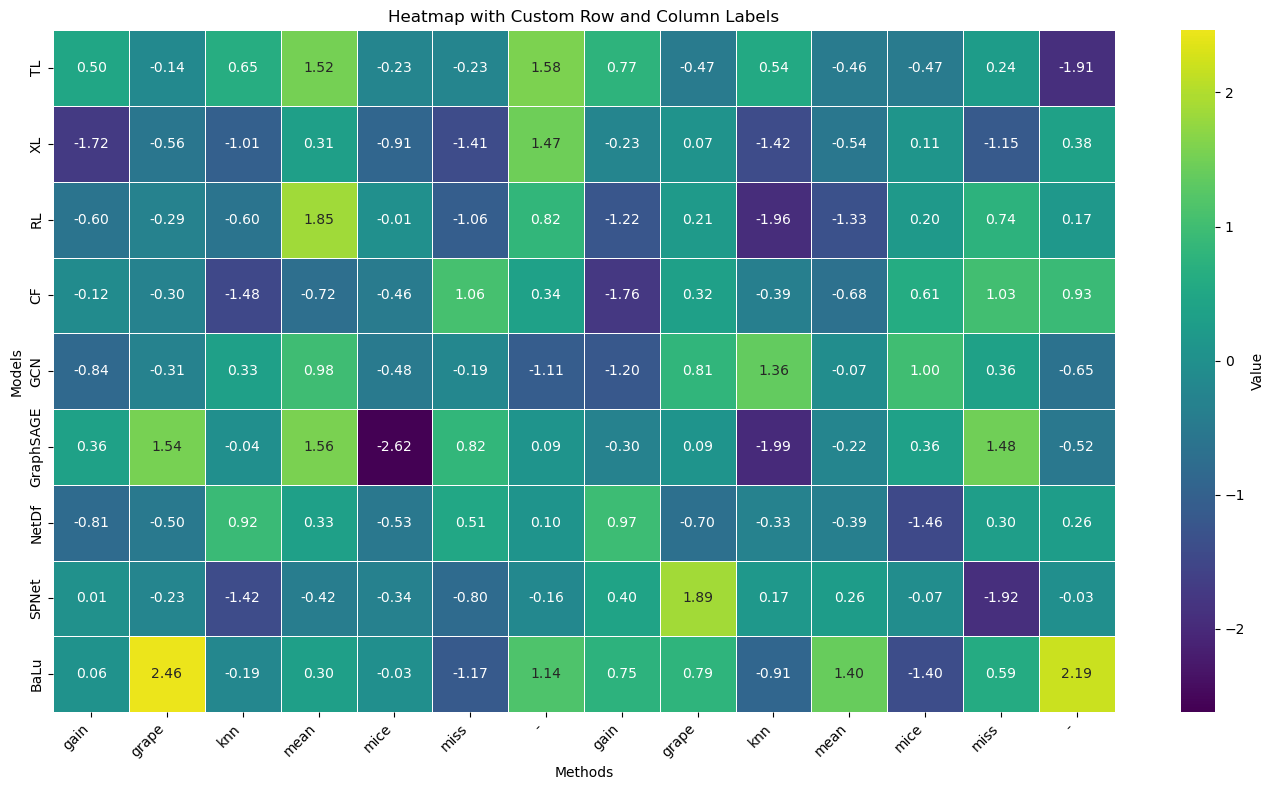

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility (optional)
np.random.seed(42)

# Define your specific labels
columns = ['gain', 'grape', 'knn', 'mean', 'mice', 'miss', '-', 'gain', 'grape', 'knn', 'mean', 'mice', 'miss', '-']
rows = ['TL', 'XL', 'RL', 'CF', 'GCN', 'GraphSAGE', 'NetDf', 'SPNet', 'BaLu']

# Generate random data with 9 rows and 14 columns
data = np.random.randn(9, 14)

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data, 
            xticklabels=columns,
            yticklabels=rows,
            annot=True,           # Show values in cells
            cmap='viridis',       # Color scheme
            center=0,             # Center colormap at 0
            fmt='.2f',            # Format numbers to 2 decimal places
            cbar_kws={'label': 'Value'},
            linewidths=0.5)       # Add grid lines

plt.title('Heatmap with Custom Row and Column Labels')
plt.xlabel('Methods')
plt.ylabel('Models')
plt.xticks(rotation=45, ha='right')  # Rotate column labels for better readability
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np

def filter_min_rows_by_method(df):
    """
    For each method, keep only the row with minimum values across specified columns.
    
    Parameters:
    df (pd.DataFrame): Input dataframe with 'method' and 'imputation' columns
    
    Returns:
    pd.DataFrame: Filtered dataframe with only the best performing row for each method
    """
    
    # Define the target columns to evaluate
    target_columns = [
        'Instagram_PEHE', 'Instagram_MAE', 'BlogCatalog_PEHE', 'BlogCatalog_MAE',
        'Flickr_PEHE', 'Flickr_MAE', 'Youtube_PEHE', 'Youtube_MAE'
    ]
    
    # Check if all target columns exist in the dataframe
    missing_cols = [col for col in target_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in dataframe: {missing_cols}")
    
    # Initialize list to store the best rows
    best_rows = []
    
    # Group by method
    for method, group in df.groupby('method'):
        # Calculate the sum of target columns for each row in this method group
        # (since lower values are better, we want the row with minimum sum)
        group_copy = group.copy()
        group_copy['total_error'] = group_copy[target_columns].sum(axis=1)
        
        # Find the row with minimum total error
        min_idx = group_copy['total_error'].idxmin()
        best_row = group.loc[min_idx]
        
        best_rows.append(best_row)
    
    # Combine all best rows into a new dataframe
    result_df = pd.DataFrame(best_rows).reset_index(drop=True)
    
    return result_df

# Alternative version if you want to consider mean instead of sum
def filter_min_rows_by_method_mean(df):
    """
    Alternative version using mean of target columns instead of sum.
    """
    target_columns = [
        'Instagram_PEHE', 'Instagram_MAE', 'BlogCatalog_PEHE', 'BlogCatalog_MAE',
        'Flickr_PEHE', 'Flickr_MAE', 'Youtube_PEHE', 'Youtube_MAE'
    ]
    
    missing_cols = [col for col in target_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in dataframe: {missing_cols}")
    
    best_rows = []
    
    for method, group in df.groupby('method'):
        group_copy = group.copy()
        group_copy['mean_error'] = group_copy[target_columns].mean(axis=1)
        
        min_idx = group_copy['mean_error'].idxmin()
        best_row = group.loc[min_idx]
        
        best_rows.append(best_row)
    
    result_df = pd.DataFrame(best_rows).reset_index(drop=True)
    return result_df

# Example usage:
sample_data = {
        'method': ['GCN_HSIC', 'GCN_HSIC', 'GCN_HSIC', 'GraphSAGE_HSIC', 'GraphSAGE_HSIC'],
        'imputation': ['gain', 'grape', 'knn', 'gain', 'grape'],
        'Instagram_PEHE': ['2.00 ± 0.22', '3.31 ± 0.53', '2.05 ± 0.23', '1.94 ± 0.22', '3.37 ± 0.61'],
        'Instagram_MAE': ['0.20 ± 0.15', '0.84 ± 0.68', '0.40 ± 0.33', '0.20 ± 0.14', '0.87 ± 0.70'],
        'BlogCatalog_PEHE': ['18.64 ± 10.90', '12.41 ± 6.78', '17.53 ± 13.48', '16.87 ± 9.22', '15.78 ± 12.62'],
        'BlogCatalog_MAE': ['0.94 ± 0.73', '0.57 ± 0.32', '0.86 ± 0.89', '0.64 ± 0.75', '0.62 ± 0.74'],
        'Flickr_PEHE': ['3.63 ± 2.35', '3.90 ± 1.74', '3.70 ± 2.24', '3.88 ± 2.15', '3.46 ± 1.76'],
        'Flickr_MAE': ['0.09 ± 0.08', '0.13 ± 0.09', '0.10 ± 0.09', '0.13 ± 0.08', '0.11 ± 0.09'],
        'Youtube_PEHE': ['2.12 ± 0.23', '3.16 ± 0.92', '2.20 ± 0.22', '2.15 ± 0.25', '3.17 ± 1.01'],
        'Youtube_MAE': ['0.15 ± 0.13', '0.42 ± 0.46', '0.10 ± 0.07', '0.19 ± 0.19', '0.26 ± 0.23']
    }
    
df = pd.DataFrame(sample_data)
print(df)

filtered_df = filter_min_rows_by_method(df)
print(filtered_df)

           method imputation Instagram_PEHE Instagram_MAE BlogCatalog_PEHE  \
0        GCN_HSIC       gain    2.00 ± 0.22   0.20 ± 0.15    18.64 ± 10.90   
1        GCN_HSIC      grape    3.31 ± 0.53   0.84 ± 0.68     12.41 ± 6.78   
2        GCN_HSIC        knn    2.05 ± 0.23   0.40 ± 0.33    17.53 ± 13.48   
3  GraphSAGE_HSIC       gain    1.94 ± 0.22   0.20 ± 0.14     16.87 ± 9.22   
4  GraphSAGE_HSIC      grape    3.37 ± 0.61   0.87 ± 0.70    15.78 ± 12.62   

  BlogCatalog_MAE  Flickr_PEHE   Flickr_MAE Youtube_PEHE  Youtube_MAE  
0     0.94 ± 0.73  3.63 ± 2.35  0.09 ± 0.08  2.12 ± 0.23  0.15 ± 0.13  
1     0.57 ± 0.32  3.90 ± 1.74  0.13 ± 0.09  3.16 ± 0.92  0.42 ± 0.46  
2     0.86 ± 0.89  3.70 ± 2.24  0.10 ± 0.09  2.20 ± 0.22  0.10 ± 0.07  
3     0.64 ± 0.75  3.88 ± 2.15  0.13 ± 0.08  2.15 ± 0.25  0.19 ± 0.19  
4     0.62 ± 0.74  3.46 ± 1.76  0.11 ± 0.09  3.17 ± 1.01  0.26 ± 0.23  
           method imputation Instagram_PEHE Instagram_MAE BlogCatalog_PEHE  \
0        GCN_HSIC    

In [ ]:

import numpy as np
import pandas as pd

def extract_mean_value(value_str):
    if isinstance(value_str, str) and '±' in value_str:
        return float(value_str.split('±')[0].strip())
    elif isinstance(value_str, (int, float)):
        return float(value_str)
    else:
        raise ValueError(f"Cannot parse value: {value_str}")

def filter_min_rows_by_method(df):
    # Define the target columns to evaluate
    target_columns = [
        'Instagram_PEHE', 'Instagram_MAE', 'BlogCatalog_PEHE', 'BlogCatalog_MAE',
        'Flickr_PEHE', 'Flickr_MAE', 'Youtube_PEHE', 'Youtube_MAE'
    ]
    
    # Check if all target columns exist in the dataframe
    missing_cols = [col for col in target_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in dataframe: {missing_cols}")
    
    # Initialize list to store the best rows
    selected_rows = []
    
    # Group by method
    for method, group in df.groupby('method'):
        # Create a copy of the group to work with
        group_copy = group.copy()
        
        # Extract numeric values from target columns
        numeric_values = pd.DataFrame(index=group_copy.index)
        for col in target_columns:
            numeric_values[col] = group_copy[col].apply(extract_mean_value)
        
        # For each target column, find rows with minimum values
        rows_to_keep = set()
        
        for col in target_columns:
            min_value = numeric_values[col].min()
            min_rows = numeric_values[numeric_values[col] == min_value].index
            rows_to_keep.update(min_rows)
        
        # Add all rows that are minimum in at least one column
        for idx in rows_to_keep:
            selected_rows.append(group.loc[idx])
    
    # Combine all selected rows into a new dataframe
    result_df = pd.DataFrame(selected_rows).reset_index(drop=True)
    
    return result_df

# Example usage with your sample data:
if __name__ == "__main__":
    # Sample data
    sample_data = {
        'method': ['GCN_HSIC', 'GCN_HSIC', 'GCN_HSIC', 'GraphSAGE_HSIC', 'GraphSAGE_HSIC'],
        'imputation': ['gain', 'grape', 'knn', 'gain', 'grape'],
        'Instagram_PEHE': ['2.00 ± 0.22', '3.31 ± 0.53', '2.05 ± 0.23', '1.94 ± 0.22', '3.37 ± 0.61'],
        'Instagram_MAE': ['0.20 ± 0.15', '0.84 ± 0.68', '0.40 ± 0.33', '0.20 ± 0.14', '0.87 ± 0.70'],
        'BlogCatalog_PEHE': ['18.64 ± 10.90', '12.41 ± 6.78', '17.53 ± 13.48', '16.87 ± 9.22', '15.78 ± 12.62'],
        'BlogCatalog_MAE': ['0.94 ± 0.73', '0.57 ± 0.32', '0.86 ± 0.89', '0.64 ± 0.75', '0.62 ± 0.74'],
        'Flickr_PEHE': ['3.63 ± 2.35', '3.90 ± 1.74', '3.70 ± 2.24', '3.88 ± 2.15', '3.46 ± 1.76'],
        'Flickr_MAE': ['0.09 ± 0.08', '0.13 ± 0.09', '0.10 ± 0.09', '0.13 ± 0.08', '0.11 ± 0.09'],
        'Youtube_PEHE': ['2.12 ± 0.23', '3.16 ± 0.92', '2.20 ± 0.22', '2.15 ± 0.25', '3.17 ± 1.01'],
        'Youtube_MAE': ['0.15 ± 0.13', '0.42 ± 0.46', '0.19 ± 0.07', '0.19 ± 0.19', '0.26 ± 0.23']
    }
    
    df = pd.DataFrame(sample_data)
    
    print("Original DataFrame:")
    print(df)
    print("\nFiltered DataFrame (best row per method):")
    filtered_df = filter_min_rows_by_method(df)
    print(filtered_df)

Original DataFrame:
           method imputation Instagram_PEHE Instagram_MAE BlogCatalog_PEHE  \
0        GCN_HSIC       gain    2.00 ± 0.22   0.20 ± 0.15    18.64 ± 10.90   
1        GCN_HSIC      grape    3.31 ± 0.53   0.84 ± 0.68     12.41 ± 6.78   
2        GCN_HSIC        knn    2.05 ± 0.23   0.40 ± 0.33    17.53 ± 13.48   
3  GraphSAGE_HSIC       gain    1.94 ± 0.22   0.20 ± 0.14     16.87 ± 9.22   
4  GraphSAGE_HSIC      grape    3.37 ± 0.61   0.87 ± 0.70    15.78 ± 12.62   

  BlogCatalog_MAE  Flickr_PEHE   Flickr_MAE Youtube_PEHE  Youtube_MAE  
0     0.94 ± 0.73  3.63 ± 2.35  0.09 ± 0.08  2.12 ± 0.23  0.15 ± 0.13  
1     0.57 ± 0.32  3.90 ± 1.74  0.13 ± 0.09  3.16 ± 0.92  0.42 ± 0.46  
2     0.86 ± 0.89  3.70 ± 2.24  0.10 ± 0.09  2.20 ± 0.22  0.19 ± 0.07  
3     0.64 ± 0.75  3.88 ± 2.15  0.13 ± 0.08  2.15 ± 0.25  0.19 ± 0.19  
4     0.62 ± 0.74  3.46 ± 1.76  0.11 ± 0.09  3.17 ± 1.01  0.26 ± 0.23  

Filtered DataFrame (best row per method):
           method imputation Instagr

In [1]:
import pandas as pd
import numpy as np

# example data
df_a = pd.DataFrame({
    'A': [10.0, 20.0,  0.0],
    'B': [ 5.0, 15.0, 30.0],
    'C': [ 2.0,  8.0, 12.0]
}, index=['x','y','z'])

df_b = pd.DataFrame({
    'A': [15.0, 18.0,  5.0],
    'B': [ 7.0, 20.0, 45.0],
    'C': [ 1.0,  9.0, 18.0]
}, index=['x','y','z'])

# compute (b - a) / a
df_ratio = (df_b - df_a) / df_a

# handle division by zero / infinities if any
df_ratio = df_ratio.replace([np.inf, -np.inf], np.nan)

# optional: convert to percent
df_pct = df_ratio * 100

print("Ratio (b-a)/a:\n", df_ratio)
print("\nPercent change:\n", df_pct)

Ratio (b-a)/a:
      A         B      C
x  0.5  0.400000 -0.500
y -0.1  0.333333  0.125
z  NaN  0.500000  0.500

Percent change:
       A          B     C
x  50.0  40.000000 -50.0
y -10.0  33.333333  12.5
z   NaN  50.000000  50.0
